<a href="https://colab.research.google.com/github/sandipanpaul21/Tree-Based-Models-in-Python/blob/master/09_Random_Forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### **Random forests — An ensemble of decision trees**

First, we discuss some of the drawbacks of the Decision Tree algorithm. This will motivate you to use Random Forests.

1. Small changes to training data can result in a significantly different tree structure.
2. It may have the problem of overfitting (the model fits the training data very well but it fails to generalize for new input data) unless you tune the model hyperparameter of max_depth.

So, instead of training a single decision tree, it is better to train a group of decision trees which together make a random forest.

#### **How random forests work behind the scenes**

The main two concepts behind random forests are:
1. **The wisdom of the crowd —** a large group of people are collectively smarter than individual experts
2. **Diversification —** a set of uncorrelated tress

A random forest consists of a group (an ensemble) of individual decision trees. Therefore, the technique is called **Ensemble Learning**. 

A large group of uncorrelated decision trees can produce more accurate and stable results than any of individual decision trees. When you train a random forest for a classification task, you actually train a group of decision trees. Then you obtain the predictions of all the individual trees and predict the class that gets the most votes. Although some individual trees produce wrong predictions, many can produce accurate predictions. As a group, they can move towards accurate predictions. This is called the wisdom of the crowd. 

To maintain a low correlation (high diversification) between individual trees, the algorithm automatically considers the following things.

1. Feature randomness

2. Bagging (bootstrap aggregating)

**Feature randomness**

- In a normal decision tree, the algorithm searches very best feature out of all the features when it wants to split a node. 
- In contrast, each tree in a random forest searches very best feature out of a random subset of features. 
- This creates extra randomness when growing the tress inside a random forest. Because of feature randomness, the decision trees in a random forest are uncorrelated.

![Feature Randomness](https://miro.medium.com/max/1400/1*h59804V5gNRmQFKdzmkGGw.png)

**Bagging (bootstrap aggregating)**

- In a random forest, each decision tree is trained on a different random sample of the training set. 
- When sampling is done with replacement, the method is called *bagging (bootstrap aggregating)*. In statistics, resampling with replacement is called bootstrapping. The bootstrap method reduces the correlation between decision trees. 
- In a decision tree, small changes to training data can result in a significantly different tree structure. The bootstrap method takes the advantage of this to produce uncorrelated trees. 
- We can demonstrate the bootstrap method with the following simple example. The same thing applies in the random forest.
  1. Imagine that we have a training set of 10 observations which are numbered from 1–10. Out of these observations, we perform sampling using the bootstrap method. 
  2. We want to consider: 
    
    i. Sample size — In machine learning, it is common to use a sample size that is the same as the training set. In this example, the sample size is 10.

    ii. The number of samples — This is equal to the number of decision trees in the random forest.
    
    iii. To create the first sample, we randomly choose an observation from the training set. Let’s say it is the 5th observation. This observation is returned to the training dataset and we repeat the process until we make the entire sample. After the entire process, imagine that we make the first sample with the following observations.
    Sample_1 = [5, 4, 6, 6, 5, 1, 3, 2, 10, 9]
    
    iv. Then we train a decision tree with this sample. Because of the replacement, some observations may appear more times in the sample. 
    
    v. Also, note that some observations don’t appear at least 1 time in the sample. Those observations are called out-of-bag (oob) observations. The oob observations for the first sample are:
    
    oob_1 = [7, 8]

    vi. The decision tree corresponding to sample 1 never sees those oob observations during the training process. So, this set of oob observations can be used as a validation set for that decision tree. 

    vii. We can evaluate the entire ensemble by averaging out the oob evaluations of each decision tree. This is called the **out-of-bag evaluation** which is an alternative to cross-validation.
  
  3. Let’s create another sample.

    Sample_2 = [5, 4, 4, 5, 5, 1, 3, 2, 10, 9]
  
    oob_2 = [6, 7, 8]

- Likewise, we create a number of samples that is equal to the number of decision trees in the random forest.

![](https://miro.medium.com/max/1400/1*-BtU2gT8Og5RE-BybDA9iQ.png)

#### **Feature importance in a random forest**

- Another great advantage of a random forest is that it allows you to get an idea about the relative importance of each feature based on a score computed during the training phase. 

- For this, he Scikit-learn RandomForestClassifier provides an attribute called feature_importances_. 
  - This returns an array of values which sum to 1. 
  - The higher the score, the more important the feature. 
  - The score is calculated based on the Gini impurity which measures the quality of a split (the lower the Gini, the better the split). 
  - Features with splits that have a greater mean decrease in Gini impurity are considered more important.

- By looking at the feature importance, you can decide which features to drop because they don’t contribute enough for making the model. This is important because of the following reasons.
  - Removing the least important features will increase the accuracy of the model. 
  - This is because we remove the noise by removing unnecessary features
  - By removing the unnecessary features, you will avoid the problem of overfitting.
  - A lesser amount of features also reduces training time.

In [ ]:
# Libraries
from sklearn import datasets
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

# Loading Dataset
boston_dataset = datasets.load_diabetes()

breast = datasets.load_breast_cancer()
df = pd.DataFrame(breast.data)
df.columns = breast.feature_names
df["WINE_TYPE"] = breast.target
X = df.drop('WINE_TYPE',axis = 1)
y = df['WINE_TYPE']

# summarize the dataset
print("Size of X and y :")
print(X.shape, y.shape)
print("\n")
print("Dataset Sample (BREAST CANCER DATASET)")
print(df.head())

Size of X and y :
(569, 30) (569,)


Dataset Sample (BREAST CANCER DATASET)
   mean radius  mean texture  ...  worst fractal dimension  WINE_TYPE
0        17.99         10.38  ...                  0.11890          0
1        20.57         17.77  ...                  0.08902          0
2        19.69         21.25  ...                  0.08758          0
3        11.42         20.38  ...                  0.17300          0
4        20.29         14.34  ...                  0.07678          0

[5 rows x 31 columns]


In [ ]:
# We will evaluate the model using repeated stratified k-fold cross-validation with three repeats and 10 folds. 
# We will report the mean and standard deviation of the accuracy of the model across all repeats and folds.

# evaluate random forest algorithm for classification
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier

# define the model
model = RandomForestClassifier()
print(model)

# evaluate the model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
print(cv)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
print("\n")
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

# Inference : 
# In this case, we can see the random forest ensemble with default hyperparameters 
# It achieves a classification accuracy of about 96 percent.

RandomForestClassifier()
RepeatedStratifiedKFold(n_repeats=3, n_splits=10, random_state=1)


Accuracy: 0.960 (0.032)


### **Random Forest Hyperparameters**

**Explore Number of Samples**

- Each decision tree in the ensemble is fit on a bootstrap sample drawn from the training dataset.
- This can be turned off by setting the “bootstrap” argument to False, if you desire. In that case, the whole training dataset will be used to train each decision tree. This is not recommended.
- The “max_samples” argument can be set to a float between 0 and 1 to control the percentage of the size of the training dataset to make the bootstrap sample used to train each decision tree.
- For example, if the training dataset has 100 rows, the max_samples argument could be set to 0.5 and each decision tree will be fit on a bootstrap sample with (100 * 0.5) or 50 rows of data.
- A smaller sample size will make trees more different, and a larger sample size will make the trees more similar. Setting max_samples to “None” will make the sample size the same size as the training dataset and this is the default.

The example below demonstrates the effect of different bootstrap sample sizes from 10 percent to 100 percent on the random forest algorithm.

% of Sample Size vs Accuracy of the Model
>0.1 0.947 (0.032)
>0.2 0.952 (0.028)
>0.3 0.954 (0.030)
>0.4 0.955 (0.030)
>0.5 0.956 (0.028)
>0.6 0.960 (0.028)
>0.7 0.956 (0.032)
>0.8 0.958 (0.028)
>0.9 0.960 (0.025)
>1.0 0.963 (0.025)
BOX PLOT OF RANDOM FOREST BOOTSTRAP SAMPLE SIZE vs CLASSIFICATION ACCURACY


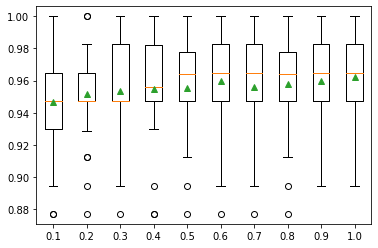

In [ ]:
# explore random forest bootstrap sample size on performance
from numpy import mean
from numpy import std
from numpy import arange
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot

print("% of Sample Size vs Accuracy of the Model")  
# get a list of models to evaluate
def get_models():
	models = dict()
	# explore ratios from 10% to 100% in 10% increments
	for i in arange(0.1, 1.1, 0.1):
		key = '%.1f' % i
		# set max_samples=None to use 100%
		if i == 1.0:
			i = None
		models[key] = RandomForestClassifier(max_samples=i)
	return models
 
# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
	# define the evaluation procedure
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	# evaluate the model and collect the results
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
	return scores
 
# get the models to evaluate
models = get_models()

# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	# evaluate the model
	scores = evaluate_model(model, X, y)
	# store the results
	results.append(scores)
	names.append(name)
	# summarize the performance along the way
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))

print("BOX PLOT OF RANDOM FOREST BOOTSTRAP SAMPLE SIZE vs CLASSIFICATION ACCURACY")
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

- In this case, the results suggest that using a bootstrap sample size that is equal to the size of the training dataset achieves the best results on this dataset.
- A box and whisker plot is created for the distribution of accuracy scores for each bootstrap sample size.
- In this case, we can see a general trend that the larger the sample, the better the performance of the model

**Explore Number of Features**

- The number of features that is randomly sampled for each split point is perhaps the most important feature to configure for random forest.

- It is set via the max_features argument and defaults to the square root of the number of input features. In this case, for our test dataset, this would be sqrt(30) or about ~5 features (will take all 30 features for now).

The example below explores the effect of the number of features randomly selected at each split point on model accuracy. We will try values from 1 to 30 and would expect a small value, around four, to perform well based on the heuristic.

Number of Feature vs Accuracy
>1 0.961 (0.022)
>2 0.960 (0.027)
>3 0.960 (0.026)
>4 0.961 (0.029)
>5 0.961 (0.024)
>6 0.958 (0.031)
>7 0.964 (0.027)
>8 0.962 (0.027)
>9 0.961 (0.027)
>10 0.963 (0.028)
>11 0.964 (0.027)
>12 0.961 (0.029)
>13 0.962 (0.028)
>14 0.964 (0.027)
>15 0.962 (0.027)
>16 0.962 (0.027)
>17 0.960 (0.025)
>18 0.960 (0.027)
>19 0.959 (0.027)
>20 0.959 (0.027)
>21 0.962 (0.026)
>22 0.957 (0.024)
>23 0.958 (0.026)
>24 0.960 (0.028)
>25 0.959 (0.028)
>26 0.958 (0.027)
>27 0.960 (0.028)
>28 0.958 (0.027)
>29 0.957 (0.025)
BOX PLOT of RANDOM FOREST FEATURE SET vs CLASSIFICATION ACCURACY


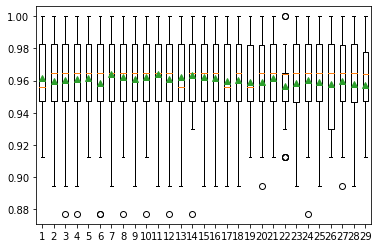

In [ ]:
# explore random forest number of features effect on performance
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot

print("Number of Feature vs Accuracy")
# get a list of models to evaluate
def get_models():
	models = dict()
	# explore number of features from 1 to 30
	for i in range(1,30):
		models[str(i)] = RandomForestClassifier(max_features=i)
	return models
 
# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
	# define the evaluation procedure
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	# evaluate the model and collect the results
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
	return scores
 
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	# evaluate the model
	scores = evaluate_model(model, X, y)
	# store the results
	results.append(scores)
	names.append(name)
	# summarize the performance along the way
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))

print("BOX PLOT of RANDOM FOREST FEATURE SET vs CLASSIFICATION ACCURACY")
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

- In this case, the results suggest that a value of four on this dataset. 
- A box and whisker plot is created for the distribution of accuracy scores for each feature set size.
- We can see a trend in performance rising and peaking with value 7.

**Explore Number of Trees**
- The number of trees is another key hyperparameter to configure for the random forest.
- Typically, the number of trees is increased until the model performance stabilizes. Intuition might suggest that more trees will lead to overfitting, although this is not the case. 
- Both bagging and random forest algorithms appear to be somewhat immune to overfitting the training dataset given the stochastic nature of the learning algorithm.
- The number of trees can be set via the “n_estimators” argument and defaults to 100.

The example below explores the effect of the number of trees with values between 10 to 1,000.

Number of Trees vs Model Accuracy
>10 0.950 (0.027)
>50 0.965 (0.029)
>100 0.962 (0.028)
>500 0.960 (0.028)
>1000 0.960 (0.027)
BOX PLOT OF RANDOM FOREST ENSEMBLE SIZE vs CLASSIFICATION ACCURACY


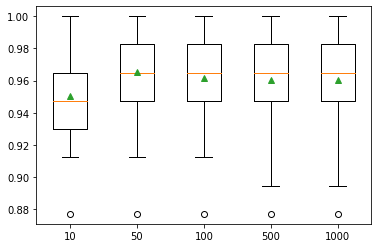

In [ ]:
# explore random forest number of trees effect on performance
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot

print("Number of Trees vs Model Accuracy")
# get a list of models to evaluate
def get_models():
	models = dict()
	# define number of trees to consider
	n_trees = [10, 50, 100, 500, 1000]
	for n in n_trees:
		models[str(n)] = RandomForestClassifier(n_estimators=n)
	return models

# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
	# define the evaluation procedure
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	# evaluate the model and collect the results
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
	return scores

# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	# evaluate the model
	scores = evaluate_model(model, X, y)
	# store the results
	results.append(scores)
	names.append(name)
	# summarize the performance along the way
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))

print("BOX PLOT OF RANDOM FOREST ENSEMBLE SIZE vs CLASSIFICATION ACCURACY")
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

In this case, we can see that performance rises and stays flat after about 100 trees. 

**Explore Tree Depth**
- A final interesting hyperparameter is the maximum depth of decision trees used in the ensemble.
- By default, trees are constructed to an arbitrary depth and are not pruned. This is a sensible default, although we can also explore fitting trees with different fixed depths.
- The maximum tree depth can be specified via the max_depth argument and is set to None (no maximum depth) by default.

The example below explores the effect of random forest maximum tree depth on model performance.

Tree Depth vs Model Accuracy
>1 0.924 (0.032)
>2 0.947 (0.031)
>3 0.955 (0.026)
>4 0.956 (0.030)
>5 0.959 (0.027)
>6 0.961 (0.026)
>7 0.961 (0.027)
>None 0.961 (0.026)
 BOX PLOT OF RANDOM FOREST MAXIMUM TREE DEPTH vs CLASSIFICATION ACCURACY


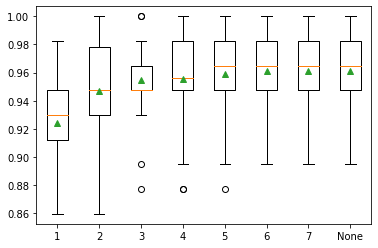

In [ ]:
# explore random forest tree depth effect on performance
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot

print("Tree Depth vs Model Accuracy")
# get a list of models to evaluate
def get_models():
	models = dict()
	# consider tree depths from 1 to 7 and None=full
	depths = [i for i in range(1,8)] + [None]
	for n in depths:
		models[str(n)] = RandomForestClassifier(max_depth=n)
	return models

# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
	# define the evaluation procedure
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	# evaluate the model and collect the results
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
	return scores

# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	# evaluate the model
	scores = evaluate_model(model, X, y)
	# store the results
	results.append(scores)
	names.append(name)
	# summarize the performance along the way
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
 
print(" BOX PLOT OF RANDOM FOREST MAXIMUM TREE DEPTH vs CLASSIFICATION ACCURACY")
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

- In this case, we can see that larger depth results in better model performance, with the default of no maximum depth achieving the best performance on this dataset.
- A box and whisker plot is created for the distribution of accuracy scores for each configured maximum tree depth.
- In this case, we can see a trend of improved performance with increase in tree depth, supporting the default of no maximum depth.




**Important Hyperparameters**

Hyperparameters are used in random forests to either enhance the performance and predictive power of models or to make the model faster.

**Following hyperparameters increases the predictive power:**

1. **n_estimators–** number of trees the algorithm builds before averaging the predictions.

2. **max_features–** maximum number of features random forest considers splitting a node.

3. **mini_sample_leaf–** determines the minimum number of leaves required to split an internal node.

**Following hyperparameters increases the speed:**

1. **n_jobs–** it tells the engine how many processors it is allowed to use. If the value is 1, it can use only one processor but if the value is -1 there is no limit.

2. **random_state–** controls randomness of the sample. The model will always produce the same results if it has a definite value of random state and if it has been given the same hyperparameters and the same training data.

3. **oob_score –** OOB means out of the bag. It is a random forest cross-validation method. In this one-third of the sample is not used to train the data instead used to evaluate its performance. These samples are called out of bag samples.

Feature vs Importance
Feature: 0, Score: 0.00155
Feature: 1, Score: 0.01837
Feature: 2, Score: 0.00140
Feature: 3, Score: 0.00505
Feature: 4, Score: 0.00384
Feature: 5, Score: 0.00152
Feature: 6, Score: 0.00539
Feature: 7, Score: 0.06155
Feature: 8, Score: 0.00203
Feature: 9, Score: 0.00225
Feature: 10, Score: 0.00312
Feature: 11, Score: 0.00265
Feature: 12, Score: 0.00212
Feature: 13, Score: 0.01419
Feature: 14, Score: 0.00216
Feature: 15, Score: 0.00267
Feature: 16, Score: 0.00331
Feature: 17, Score: 0.00332
Feature: 18, Score: 0.00242
Feature: 19, Score: 0.00487
Feature: 20, Score: 0.09551
Feature: 21, Score: 0.02931
Feature: 22, Score: 0.29336
Feature: 23, Score: 0.11481
Feature: 24, Score: 0.00939
Feature: 25, Score: 0.00274
Feature: 26, Score: 0.00783
Feature: 27, Score: 0.29573
Feature: 28, Score: 0.00322
Feature: 29, Score: 0.00430
Plot Feature Importance


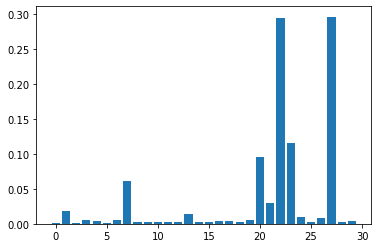

In [ ]:
# Feature Importance

print("Feature vs Importance")
# define the model
model = RandomForestRegressor()
# fit the model
model.fit(X, y)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))

print("Plot Feature Importance")
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

So from the above plot we can say 6 important variavles are there (6 high bars)